epochs: 0
Epoch 0, error = [0.4798685] 

Epoch 500, error = [0.36803916] 

Epoch 1000, error = [-0.0015044] 

Epoch 1500, error = [0.04543529] 

Epoch 2000, error = [-0.01041826] 

Epoch 2500, error = [0.02715534] 

Epoch 3000, error = [0.01569354] 

Epoch 3500, error = [-0.00368962] 

Epoch 4000, error = [0.00948726] 

Epoch 4500, error = [0.00909405] 

Epoch 5000, error = [-0.06584199] 

Epoch 5500, error = [-0.04697443] 

Epoch 6000, error = [0.04058895] 

Epoch 6500, error = [0.00392417] 

Epoch 7000, error = [0.0039121] 

Epoch 7500, error = [-0.05478204] 

Epoch 8000, error = [-0.00516938] 

Epoch 8500, error = [-0.0405012] 

Epoch 9000, error = [0.08528318] 

Epoch 9500, error = [0.00303392] 

epochs: 10000
Epoch 10000, error = [0.01896205] 

Epoch 10500, error = [0.00149207] 

Epoch 11000, error = [-0.00772249] 

Epoch 11500, error = [-0.0555104] 

Epoch 12000, error = [0.05168863] 

Epoch 12500, error = [0.02257945] 

Epoch 13000, error = [0.00181823] 

Epoch 13500, error = [0

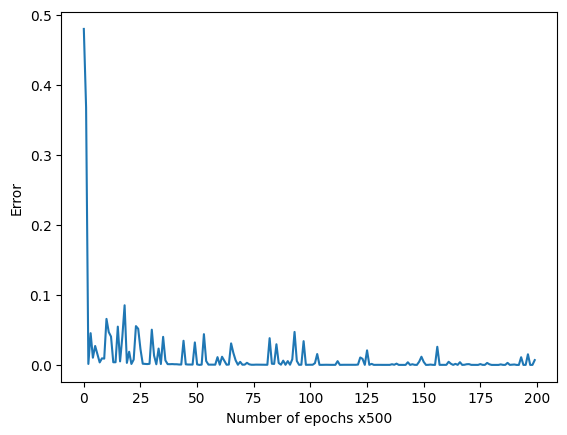

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))

def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1 - np.tanh(x)**2


class NeuralNetwork:

    def __init__(self, layers, activation='tanh'):
        if activation == 'sigmoid':
            self.activation = sigmoid
            self.activation_prime = sigmoid_prime
        elif activation == 'tanh':
            self.activation = tanh
            self.activation_prime = tanh_prime

        # Set weights
        self.weights = []
        self.error_arr = []
        # layers = [2,2,1]
        # range of weight values (-1,1)
        # input and hidden layers - random((2+1, 2+1)) : 3 x 3
        for i in range(1, len(layers) - 1):
            r = 2*np.random.random((layers[i-1] + 1, layers[i] + 1)) -1
            self.weights.append(r)
        # output layer - random((2+1, 1)) : 3 x 1
        r = 2*np.random.random( (layers[i] + 1, layers[i+1])) - 1
        self.weights.append(r)

    def fit(self, X, y, learning_rate=0.2, epochs=100000):
        # Add column of ones to X
        # This is to add the bias unit to the input layer
        ones = np.atleast_2d(np.ones(X.shape[0]))
        X = np.concatenate((ones.T, X), axis=1)
         
        error_arr = []

        for k in range(epochs):
            if k % 10000 == 0: print('epochs:', k)
            
            i = np.random.randint(X.shape[0])
            a = [X[i]]
            for l in range(len(self.weights)):
                dot_value = np.dot(a[l], self.weights[l])
                activation = self.activation(dot_value)
                a.append(activation)
            # output layer
            
            error = y[i] - a[-1]
            if (k%500 == 0):
                error_arr.append(abs(error))
                print(f"Epoch {k}, error = {error} \n")
                
            deltas = [error * self.activation_prime(a[-1])]

            # we need to begin at the second to last layer 
            # (a layer before the output layer)
            for l in range(len(a) - 2, 0, -1): 
                deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_prime(a[l]))

            # reverse
            # [level3(output)->level2(hidden)]  => [level2(hidden)->level3(output)]
            deltas.reverse()

            # backpropagation
            # 1. Multiply its output delta and input activation 
            #    to get the gradient of the weight.
            # 2. Subtract a ratio (percentage) of the gradient from the weight.
            for i in range(len(self.weights)):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                self.weights[i] += learning_rate * layer.T.dot(delta)

        self.error_arr = error_arr

    def predict(self, x): 
        a = np.concatenate((np.ones(1).T, np.array(x)))      
        for l in range(0, len(self.weights)):
            a = self.activation(np.dot(a, self.weights[l]))
        return a
    
    def plot_errors(self):
        plt.plot(self.error_arr)
        plt.xlabel('Number of epochs x500')
        plt.ylabel('Error')



if __name__ == '__main__':

    nn = NeuralNetwork([2,2,1],'tanh')

    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

    y = np.array([0, 1, 1, 0])

    nn.fit(X, y)

    for e in X:
        print(e,nn.predict(e))

    nn.plot_errors()

In [21]:
if __name__ == '__main__':

    nn = NeuralNetwork([2,2,1],'tanh')

    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    # AND
    y = np.array([0, 0, 0, 1])

    nn.fit(X, y)

    for e in X:
        print(e,nn.predict(e))

epochs: 0
Epoch 0, error = [0.93471429] 

Epoch 500, error = [0.00982115] 

Epoch 1000, error = [-0.00039405] 

Epoch 1500, error = [-0.00780233] 

Epoch 2000, error = [-0.01899817] 

Epoch 2500, error = [-0.11840765] 

Epoch 3000, error = [0.00997505] 

Epoch 3500, error = [0.05399729] 

Epoch 4000, error = [0.00057838] 

Epoch 4500, error = [0.00159897] 

Epoch 5000, error = [0.01573436] 

Epoch 5500, error = [0.00989779] 

Epoch 6000, error = [0.00240068] 

Epoch 6500, error = [0.00247547] 

Epoch 7000, error = [-0.00627551] 

Epoch 7500, error = [-0.00714687] 

Epoch 8000, error = [0.12887299] 

Epoch 8500, error = [0.00110485] 

Epoch 9000, error = [-0.00393507] 

Epoch 9500, error = [-0.00038281] 

epochs: 10000
Epoch 10000, error = [0.00148355] 

Epoch 10500, error = [-0.0126195] 

Epoch 11000, error = [0.00133453] 

Epoch 11500, error = [0.00142972] 

Epoch 12000, error = [0.00020965] 

Epoch 12500, error = [0.002001] 

Epoch 13000, error = [-0.00045328] 

Epoch 13500, error = 

In [22]:
if __name__ == '__main__':

    nn = NeuralNetwork([2,2,1],'tanh')

    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    # OR
    y = np.array([0, 1, 1, 1])

    nn.fit(X, y)

    for e in X:
        print(e,nn.predict(e))

epochs: 0
Epoch 0, error = [0.08207899] 

Epoch 500, error = [0.00192237] 

Epoch 1000, error = [0.00505056] 

Epoch 1500, error = [0.00294114] 

Epoch 2000, error = [0.00025041] 

Epoch 2500, error = [0.00034358] 

Epoch 3000, error = [0.00153605] 

Epoch 3500, error = [0.00117762] 

Epoch 4000, error = [0.00113118] 

Epoch 4500, error = [0.00019516] 

Epoch 5000, error = [-0.00080863] 

Epoch 5500, error = [0.0007346] 

Epoch 6000, error = [0.00066842] 

Epoch 6500, error = [0.00013731] 

Epoch 7000, error = [0.00056831] 

Epoch 7500, error = [0.00058691] 

Epoch 8000, error = [0.00049127] 

Epoch 8500, error = [0.00051418] 

Epoch 9000, error = [-0.00012983] 

Epoch 9500, error = [-0.0002051] 

epochs: 10000
Epoch 10000, error = [9.05483701e-05] 

Epoch 10500, error = [0.00036709] 

Epoch 11000, error = [0.00034933] 

Epoch 11500, error = [0.00033345] 

Epoch 12000, error = [-0.00029085] 

Epoch 12500, error = [0.00034276] 

Epoch 13000, error = [0.00014989] 

Epoch 13500, error = [

In [24]:
if __name__ == '__main__':

    nn = NeuralNetwork([2,2,1],'sigmoid')

    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

    y = np.array([0, 1, 1, 0])

    nn.fit(X, y)

    for e in X:
        print(e,nn.predict(e))

epochs: 0
Epoch 0, error = [-0.52638471] 

Epoch 500, error = [0.51727123] 

Epoch 1000, error = [0.52465018] 

Epoch 1500, error = [-0.47462396] 

Epoch 2000, error = [0.50578143] 

Epoch 2500, error = [-0.5185003] 

Epoch 3000, error = [-0.44426246] 

Epoch 3500, error = [0.49201361] 

Epoch 4000, error = [0.49830158] 

Epoch 4500, error = [0.51738016] 

Epoch 5000, error = [0.51103785] 

Epoch 5500, error = [0.48344881] 

Epoch 6000, error = [-0.51030688] 

Epoch 6500, error = [-0.53731527] 

Epoch 7000, error = [-0.50330182] 

Epoch 7500, error = [-0.47820494] 

Epoch 8000, error = [0.51400054] 

Epoch 8500, error = [0.55090015] 

Epoch 9000, error = [-0.52056838] 

Epoch 9500, error = [-0.53385552] 

epochs: 10000
Epoch 10000, error = [0.51898602] 

Epoch 10500, error = [-0.48006707] 

Epoch 11000, error = [-0.47299881] 

Epoch 11500, error = [-0.48611647] 

Epoch 12000, error = [0.49605734] 

Epoch 12500, error = [0.50662095] 

Epoch 13000, error = [-0.50506667] 

Epoch 13500, er

In [23]:
if __name__ == '__main__':

    nn = NeuralNetwork([2,2,1],'sigmoid')

    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    # AND
    y = np.array([0, 0, 0, 1])

    nn.fit(X, y)

    for e in X:
        print(e,nn.predict(e))

epochs: 0
Epoch 0, error = [-0.57860071] 

Epoch 500, error = [-0.1448767] 

Epoch 1000, error = [-0.29865636] 

Epoch 1500, error = [0.38943574] 

Epoch 2000, error = [-0.22601752] 

Epoch 2500, error = [-0.00040632] 

Epoch 3000, error = [-0.1063593] 

Epoch 3500, error = [-5.09858547e-05] 

Epoch 4000, error = [0.1703398] 

Epoch 4500, error = [-1.02298969e-05] 

Epoch 5000, error = [-0.05947775] 

Epoch 5500, error = [-3.30434039e-06] 

Epoch 6000, error = [0.09256717] 

Epoch 6500, error = [-0.04178461] 

Epoch 7000, error = [-0.0410218] 

Epoch 7500, error = [-0.03186454] 

Epoch 8000, error = [-0.04173943] 

Epoch 8500, error = [-0.04150429] 

Epoch 9000, error = [0.05679272] 

Epoch 9500, error = [-0.02323408] 

epochs: 10000
Epoch 10000, error = [-2.37571863e-07] 

Epoch 10500, error = [-1.96865495e-07] 

Epoch 11000, error = [-0.01992262] 

Epoch 11500, error = [-0.02168368] 

Epoch 12000, error = [-0.02149396] 

Epoch 12500, error = [-0.0184838] 

Epoch 13000, error = [-9.12

In [25]:
if __name__ == '__main__':

    nn = NeuralNetwork([2,2,1],'sigmoid')

    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    # OR
    y = np.array([0, 1, 1, 1])

    nn.fit(X, y)

    for e in X:
        print(e,nn.predict(e))

epochs: 0
Epoch 0, error = [-0.46500673] 

Epoch 500, error = [-0.71137356] 

Epoch 1000, error = [0.1490139] 

Epoch 1500, error = [-0.34412575] 

Epoch 2000, error = [-0.25188361] 

Epoch 2500, error = [0.0749091] 

Epoch 3000, error = [0.049752] 

Epoch 3500, error = [0.03598605] 

Epoch 4000, error = [0.03271674] 

Epoch 4500, error = [0.02714098] 

Epoch 5000, error = [0.02502223] 

Epoch 5500, error = [-0.03898983] 

Epoch 6000, error = [0.01621317] 

Epoch 6500, error = [0.01570848] 

Epoch 7000, error = [-0.02621679] 

Epoch 7500, error = [0.00143525] 

Epoch 8000, error = [-0.02238948] 

Epoch 8500, error = [0.00978391] 

Epoch 9000, error = [0.00110925] 

Epoch 9500, error = [-0.01758547] 

epochs: 10000
Epoch 10000, error = [0.00828595] 

Epoch 10500, error = [0.00090868] 

Epoch 11000, error = [0.00715115] 

Epoch 11500, error = [0.00626794] 

Epoch 12000, error = [-0.01277277] 

Epoch 12500, error = [0.00556318] 

Epoch 13000, error = [0.00577124] 

Epoch 13500, error = [0